## Clustering on Diva without division on targets trying other things to make LIME generate the neighborhood

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import category_encoders as ce
from pathlib import Path
from featurewiz import featurewiz
from sklearn.preprocessing import StandardScaler, MinMaxScaler
np.random.seed(10)

Imported version = 0.1.60.
from featurewiz import FeatureWiz
wiz = FeatureWiz(verbose=1)
X_train_selected = wiz.fit_transform(X_train, y_train)
X_test_selected = wiz.transform(X_test)
wiz.features  ### provides a list of selected features ###
                                


In [2]:
import bz2
import pickle

def save_pickle_bz2(path: str, obj):
    """Saves a pickle file compressed in BZ2 format.

    Args:
        path (str): Path where to save object.
        obj (Any): Object to save.
    """
    with bz2.open(path, "wb") as f:
        pickle.dump(obj, f)
def load_pickle_bz2(path):
    """
    Loads data saved with save_pickle_bz2

    Args:
        path (str): Path where the data are located

    Returns:
        loaded object
    """
    with bz2.BZ2File(path) as f:
        data = pickle.load(f)
    return data

In [3]:
df = pd.read_excel("./processed_diva.xlsx")
df = df.dropna()
df = df.drop_duplicates()
features, target = df.iloc[:,:-1], df.iloc[:,-1]

In [4]:
target = target.map({0.0: 0, 3.0: 1})

In [5]:
numeric = features.select_dtypes('number')

# feature selection with featurewiz

https://hackernoon.com/automatic-feature-selection-in-python-an-essential-guide-uv3e37mk

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (11829, 87)
    Loaded train data. Shape = (11829, 87)
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Binary_Classification problem ####
    loading a random sample of 10000 rows into pandas for EDA
#######################################################################################
################

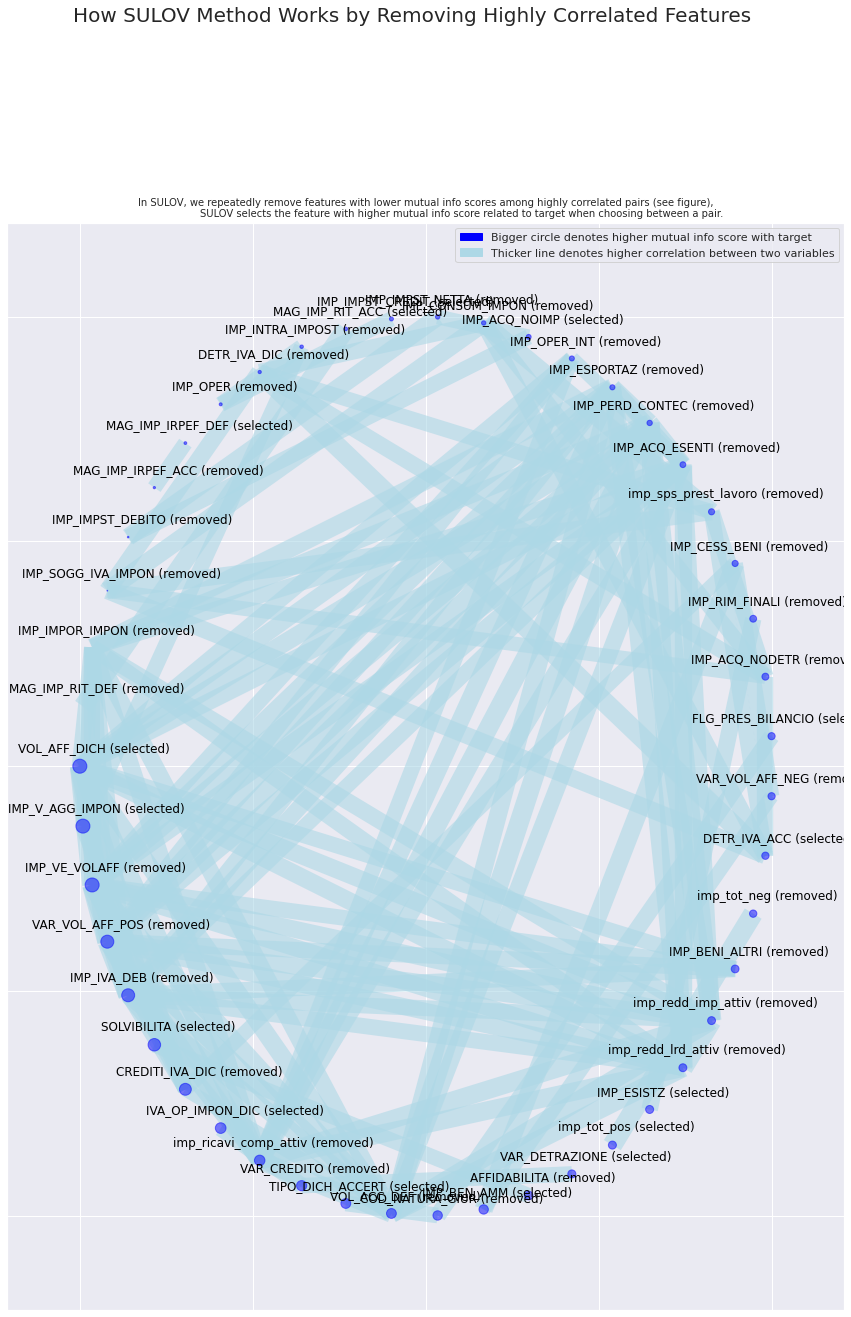

Time taken for SULOV method = 2 seconds
    Adding 0 categorical variables to reduced numeric variables  of 50
Final list of selected vars after SULOV = 50
Readying dataset for Recursive XGBoost by converting all features to numeric...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Current number of predictors = 50 
    XGBoost version: 1.6.1
Number of booster rounds = 100
        using 50 variables...
            Time taken for regular XGBoost feature selection = 1 seconds
        using 40 variables...
            Time taken for regular XGBoost feature selection = 2 seconds
        using 30 variables...
            Time taken for regular XGBoost feature selection

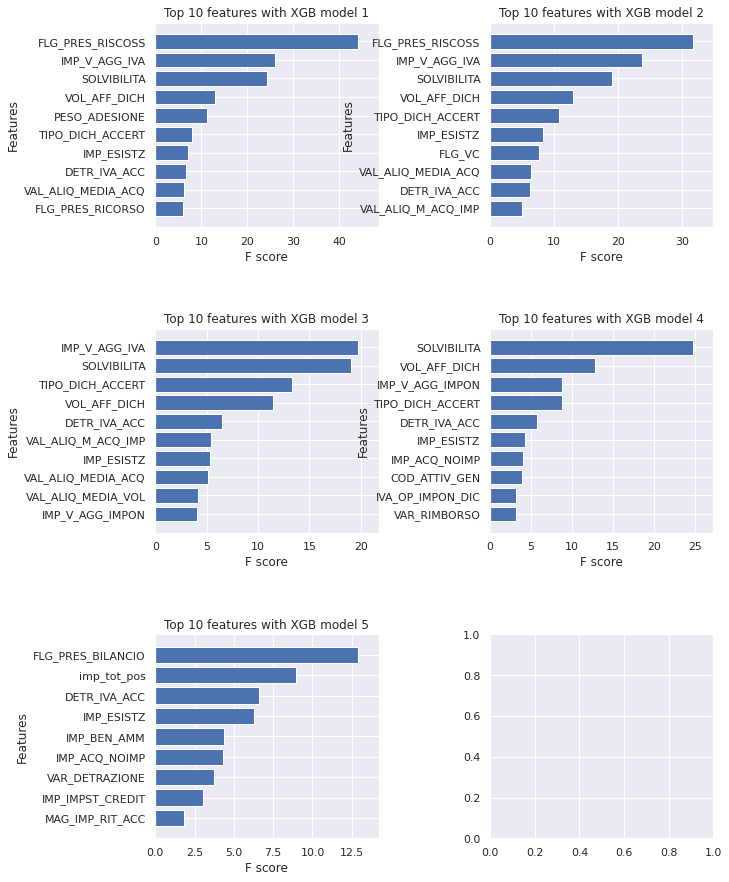

            Total time taken for XGBoost feature selection = 4 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 26 important features:
['FLG_PRES_RISCOSS', 'IMP_V_AGG_IVA', 'SOLVIBILITA', 'VOL_AFF_DICH', 'PESO_ADESIONE', 'TIPO_DICH_ACCERT', 'IMP_ESISTZ', 'DETR_IVA_ACC', 'VAL_ALIQ_MEDIA_ACQ', 'FLG_PRES_RICORSO', 'STATO_CONTROLLO', 'VAL_ALIQ_M_ACQ_IMP', 'FLG_VC', 'IMP_V_AGG_IMPON', 'VAR_RIMBORSO', 'VAL_ALIQ_MEDIA_VOL', 'IMP_IMPST_CREDIT', 'IMP_ACQ_NOIMP', 'COD_ATTIV_GEN', 'IVA_OP_IMPON_DIC', 'IMP_BEN_AMM', 'IMP_ECC_PREC', 'FLG_PRES_BILANCIO', 'imp_tot_pos', 'VAR_DETRAZIONE', 'MAG_IMP_RIT_ACC']

    Time taken for feature selection = 6 seconds
Returning 2 dataframes: dataname and test_data with 26 important features.


In [6]:
data = numeric.copy()
data['Target'] = target
features, train = featurewiz(data, target='Target', corr_limit=0.7, verbose=2, header=0,test_data="", feature_engg="", category_encoders="")

In [7]:
features

['FLG_PRES_RISCOSS',
 'IMP_V_AGG_IVA',
 'SOLVIBILITA',
 'VOL_AFF_DICH',
 'PESO_ADESIONE',
 'TIPO_DICH_ACCERT',
 'IMP_ESISTZ',
 'DETR_IVA_ACC',
 'VAL_ALIQ_MEDIA_ACQ',
 'FLG_PRES_RICORSO',
 'STATO_CONTROLLO',
 'VAL_ALIQ_M_ACQ_IMP',
 'FLG_VC',
 'IMP_V_AGG_IMPON',
 'VAR_RIMBORSO',
 'VAL_ALIQ_MEDIA_VOL',
 'IMP_IMPST_CREDIT',
 'IMP_ACQ_NOIMP',
 'COD_ATTIV_GEN',
 'IVA_OP_IMPON_DIC',
 'IMP_BEN_AMM',
 'IMP_ECC_PREC',
 'FLG_PRES_BILANCIO',
 'imp_tot_pos',
 'VAR_DETRAZIONE',
 'MAG_IMP_RIT_ACC']

In [8]:
train

,FLG_PRES_RISCOSS,IMP_V_AGG_IVA,SOLVIBILITA,VOL_AFF_DICH,PESO_ADESIONE,TIPO_DICH_ACCERT,IMP_ESISTZ,DETR_IVA_ACC,VAL_ALIQ_MEDIA_ACQ,FLG_PRES_RICORSO,...,IMP_ACQ_NOIMP,COD_ATTIV_GEN,IVA_OP_IMPON_DIC,IMP_BEN_AMM,IMP_ECC_PREC,FLG_PRES_BILANCIO,imp_tot_pos,VAR_DETRAZIONE,MAG_IMP_RIT_ACC,Target
0,1.0,5306335.0,3.0,27245028.00,48.0,3.0,0.0,1337486.0,6.59,0.0,...,428791.0,6.0,-466745.0,61681.0,10728.0,1.0,0.0,466745.0,0.0,0
1,0.0,172597.0,3.0,1283657.75,0.0,2.0,0.0,0.0,3.44,0.0,...,6227.0,10.0,-38741.5,20968.0,0.0,0.0,0.0,4.0,0.0,0
2,0.0,291567.0,3.0,1247396.00,0.0,3.0,0.0,0.0,11.35,0.0,...,0.0,8.0,-48344.0,3716.0,8799.0,1.0,0.0,48344.0,0.0,0
3,0.0,-13314.0,4.0,21636.00,0.0,3.0,0.0,0.0,18.40,0.0,...,0.0,12.0,-8625.0,0.0,0.0,1.0,0.0,8625.0,0.0,0
4,1.0,20237.0,3.0,765720.00,0.0,2.0,0.0,0.0,6.10,0.0,...,0.0,10.0,-10329.0,15434.0,0.0,0.0,0.0,10329.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12494,0.0,-1778240.0,3.0,0.00,0.0,3.0,0.0,263885.0,19.67,0.0,...,0.0,8.0,-524045.0,1744944.0,0.0,0.0,0.0,524045.0,0.0,1
12495,0.0,-24041.0,3.0,0.00,0.0,3.0,0.0,0.0,20.00,0.0,...,0.0,16.0,-69870.0,0.0,259.0,0.0,0.0,69870.0,0.0,1
12496,0.0,-447022.0,3.0,0.00,0.0,3.0,0.0,0.0,19.99,0.0,...,0.0,18.0,-108968.0,445185.0,6.0,1.0,0.0,42968.0,0.0,1
12497,0.0,-40617.0,3.0,0.00,0.0,3.0,0.0,0.0,19.84,0.0,...,0.0,18.0,-23087.0,39960.0,0.0,1.0,0.0,23087.0,0.0,1


In [9]:
X_new = train.drop(['Target'],axis=1)
y = train.Target.values 
X_scaled = StandardScaler().fit_transform(X_new)

In [10]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from kneed import KneeLocator

CLUSTERS = [*range(2, 12)]

def print_metrics(X, kmeans):
    """print the metrics of the kmeans model.
    Parameters
    ----------
        X - normalized dataset
        kmeans - model.
    Prints
    ------
        K
        SSE
        Silhouette score
        Separation
    
    """
    print(f'K={len(kmeans.cluster_centers_)}')
    print('\tSSE:\t\t{}'.format(kmeans.inertia_))
    print('\tSilhouette:\t\t{}'.format(metrics.silhouette_score(X, kmeans.labels_)))
    print('\tDaviesBouldin score:\t\t{}'.format(metrics.davies_bouldin_score(X, kmeans.labels_)))

def run_kmeans(X, range_nclusters=CLUSTERS):
    '''runs kmeans for different values of k'''
    inertia, models = [], []
    for k in range_nclusters:
        k_means = KMeans(init='k-means++', n_clusters= k, n_init=20, random_state=123)
        model = k_means.fit(X) #returns fitted estimator
        models.append(model)
        inertia.append(k_means.inertia_)
    return inertia, models

def plot_silouette(data, models):
    """
    models - list of already fit kmeans models
    """
    fig, axs = plt.subplots(ncols=len(models), figsize=(15,5), sharex=True, sharey=True)
    for i,model in enumerate(models):
        nclusters = model.n_clusters
        axs[i].set_xlim([-0.1, 1])
        axs[i].set_ylim([0, len(data) + (nclusters + 1) * 10])
        axs[i].set_title(f"$K={nclusters}$")
        
        clusters = model.predict(data)
        silhouette_avg = silhouette_score(data, clusters)
        
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(data, clusters)
        
        y_lower = 10
        for j in range(nclusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[clusters == j]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(j) / nclusters)
            axs[i].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            axs[i].text(-0.05, y_lower + 0.5 * size_cluster_i, str(j))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
        
        # The vertical line for average silhouette score of all the values
        axs[i].axvline(x=silhouette_avg, color="red", linestyle="--")

        axs[i].set_yticks([])  # Clear the yaxis labels / ticks
        axs[i].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        
    plt.tight_layout()

In [11]:
wcss_std, models_std = run_kmeans(X_scaled)

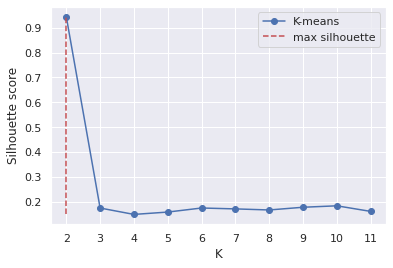

In [12]:
sil_score_std = []
for m in models_std:
    sil_score_std.append(silhouette_score(X_scaled, m.labels_))
    
plt.plot(CLUSTERS, sil_score_std, 'bo-', label="K-means")
plt.vlines(np.argmax(sil_score_std) + 2, min(sil_score_std), max(sil_score_std), 'r', '--', label="max silhouette")
plt.xticks(CLUSTERS)
plt.xlabel("K")
plt.xticks(range(2, 12))
plt.ylabel("Silhouette score")
plt.legend()
plt.show()

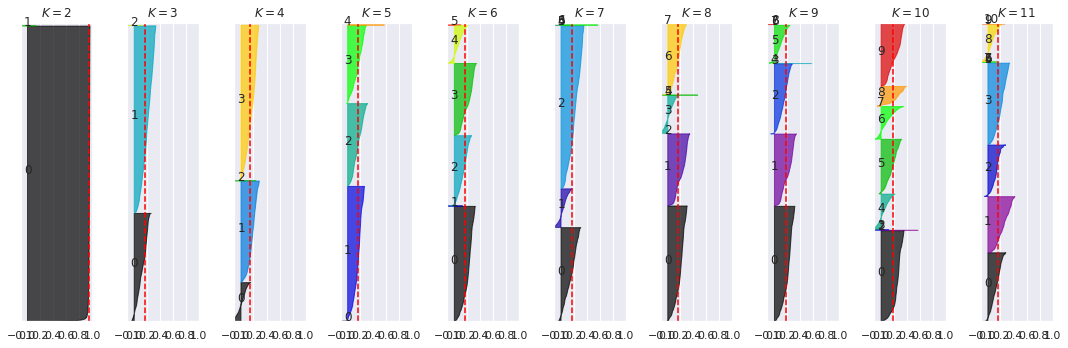

In [13]:
plot_silouette(X_scaled, models_std[0:10])

# Pick K = 3

In [14]:
models_std[1]

KMeans(n_clusters=3, n_init=20, random_state=123)

In [15]:
kmeans_k3 = models_std[1]

In [16]:
train['Cluster'] = kmeans_k3.predict(X_scaled)
train[features]  = X_scaled

There are only five points in the cluster 2, I remove them and I'm left with two clusters

In [17]:
train['Cluster'].value_counts()

1    7496
0    4328
2       5
Name: Cluster, dtype: int64

In [18]:
train = train[train.Cluster != 2]

Check percentage of items belonging to the same cluster

In [19]:
train['Cluster'].value_counts(normalize=True)

1    0.633965
0    0.366035
Name: Cluster, dtype: float64

In [20]:
train.Target.value_counts(normalize=True)

0    0.737568
1    0.262432
Name: Target, dtype: float64

# Splitting into train/test/validation

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_test, validation = train_test_split(train, train_size=0.8, stratify=train['Cluster'], random_state=123)
train_set, test_set = train_test_split(train_test, train_size=0.7, stratify=train_test['Cluster'], random_state=123)

In [23]:
for s in ["train_set", "test_set", "validation"]:
    ss = eval(s)
    print(f"len({s})={len(ss)}")
    print("clusters distribution")
    print(ss['Cluster'].value_counts(normalize=True))

len(train_set)=6621
clusters distribution
1    0.634043
0    0.365957
Name: Cluster, dtype: float64
len(test_set)=2838
clusters distribution
1    0.633897
0    0.366103
Name: Cluster, dtype: float64
len(validation)=2365
clusters distribution
1    0.633827
0    0.366173
Name: Cluster, dtype: float64


Generating the set of centroids neighbors

In [25]:
from sklearn.metrics import pairwise_distances

def find_nearest_neighbors(df: pd.DataFrame, centroids, k, columns_to_consider=features, cluster_col='Cluster', group_by=['Cluster']):
    """
    
    """
    assert len(columns_to_consider) == len(centroids[0])
    # indices of the elements to put in the final dataframe
    clustered_ind = []
    for (_, cluster), cent in zip(df.groupby(group_by), centroids):
        #print(cluster[cluster_col].value_counts())
        #print(f"Centroid: {cent}")
        features = cluster[columns_to_consider].copy()
        distances = pairwise_distances(features, [cent])
        features['Dist'] = distances
        # sort by distance and get the first k rows
        sorted_f = features.sort_values(by=['Dist']).head(k)
        clustered_ind += sorted_f.index.to_list()
    return df.loc[clustered_ind]

In [26]:
centroids = kmeans_k3.cluster_centers_[:-1]

In [34]:
centroids_neighbors = find_nearest_neighbors(test_set, centroids, 15)

In [49]:
centroids_neighbors

,FLG_PRES_RISCOSS,IMP_V_AGG_IVA,SOLVIBILITA,VOL_AFF_DICH,PESO_ADESIONE,TIPO_DICH_ACCERT,IMP_ESISTZ,DETR_IVA_ACC,VAL_ALIQ_MEDIA_ACQ,FLG_PRES_RICORSO,...,COD_ATTIV_GEN,IVA_OP_IMPON_DIC,IMP_BEN_AMM,IMP_ECC_PREC,FLG_PRES_BILANCIO,imp_tot_pos,VAR_DETRAZIONE,MAG_IMP_RIT_ACC,Target,Cluster
4379,1.518260,-0.009459,0.228899,-0.043532,0.301692,0.477425,-0.082859,-0.077551,0.105946,-0.542534,...,-0.301464,0.166914,-0.025521,-0.075926,0.828543,-0.139304,-0.178278,-0.035737,0,0
385,1.518260,-0.014147,-0.737083,-0.049829,1.053058,0.477425,-0.082859,-0.074276,-0.165483,-0.542534,...,0.619156,0.189243,-0.026293,-0.074173,0.828543,-0.139304,-0.214117,-0.035737,0,0
3235,1.518260,-0.020038,0.228899,-0.050791,1.053058,0.477425,-0.082859,-0.077551,0.320746,-0.542534,...,-0.301464,0.177532,-0.026360,-0.075926,0.828543,-0.139304,-0.195321,-0.035737,0,0
1326,1.518260,-0.015511,0.228899,-0.050022,1.053058,0.477425,-0.082859,-0.073893,0.227015,-0.542534,...,0.619156,0.162122,-0.024651,-0.075908,0.828543,-0.139304,-0.170591,-0.035737,0,0
4073,1.518260,-0.004531,0.228899,-0.047082,1.334821,0.477425,-0.082859,-0.077551,0.402760,-0.542534,...,-0.301464,0.187673,-0.026360,-0.075926,0.828543,-0.139304,-0.210527,-0.035737,0,0
8437,1.518260,-0.014044,0.228899,-0.050166,1.053058,-1.161895,0.055793,-0.077551,-0.054177,-0.542534,...,-0.301464,0.185375,-0.026320,-0.075926,-1.206937,0.458519,-0.207909,-0.035737,0,0
2245,1.518260,-0.016297,0.228899,-0.050212,1.334821,0.477425,-0.082859,-0.077551,0.158670,-0.542534,...,0.619156,0.184148,-0.025940,-0.075926,0.828543,-0.139304,-0.205940,-0.035737,0,0
6879,1.518260,-0.015519,-0.737083,-0.050278,1.053058,-1.161895,-0.014455,-0.077551,-0.046367,-0.542534,...,0.619156,0.188593,-0.026351,-0.075926,-1.206937,0.342864,-0.213074,-0.035737,0,0
3861,1.518260,-0.017332,-0.737083,-0.050577,1.053058,-1.161895,-0.082859,-0.076334,-0.641948,-0.542534,...,0.619156,0.187312,-0.026070,-0.075926,-1.206937,0.084697,-0.211018,-0.035737,0,0
703,1.518260,-0.016185,-0.737083,-0.050513,1.053058,-1.161895,-0.062080,-0.077551,0.141095,-0.542534,...,0.619156,0.188855,-0.026313,-0.075926,-1.206937,0.122342,-0.213493,-0.035737,0,0


# Creating a random forest

In [36]:
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [46]:
# Hyperparameters of the grid search
__HYPERPARAMETERS = {
    "bootstrap": [True, False],
    "max_depth": [100, 350, 500],
    "min_samples_leaf": [10, 20, 50],
    "min_samples_split": [5, 10, 50],
    "n_estimators": [100, 150, 350, 500],
    "criterion": ["gini", "entropy"],
}

def create_random_forest(
        x,
        y,
        hyperparameters=__HYPERPARAMETERS,
        n_jobs=12
) -> RandomForestClassifier:
    """Creates a random forest classifier via grid search.

    Args:
        x (ndarray): Training input examples.
        y (ndarray): Training target values.
        hyperparameters (Dict[str, List[Any]], optional): Dictionary of hyperparameters for the grid search. Defaults to the fixed ones.
        n_jobs: Number of jobs to run in parallel in the grid search. (default 4)

    Returns:
        RandomForestClassifier: Random forest classifier.
    """

    rf = RandomForestClassifier()
    clf = HalvingGridSearchCV(rf, hyperparameters, refit=True, n_jobs=n_jobs, verbose=1)
    clf.fit(x, y)
    return clf.best_estimator_

In [47]:
X_train = train_set[features].to_numpy()
y_train = train_set.Target.values
X_test = test_set[features].to_numpy()
y_test = test_set.Target.values

In [50]:
X_centroids_neighbors = centroids_neighbors[features].to_numpy()
y_centroids_neighbors = centroids_neighbors.Target.to_numpy()

In [48]:
rf = create_random_forest(X_train, y_train)
print(classification_report(y_test, rf.predict(X_test)))

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 27
max_resources_: 6621
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 432
n_resources: 27
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
----------
iter: 1
n_candidates: 144
n_resources: 81
Fitting 5 folds for each of 144 candidates, totalling 720 fits
----------
iter: 2
n_candidates: 48
n_resources: 243
Fitting 5 folds for each of 48 candidates, totalling 240 fits
----------
iter: 3
n_candidates: 16
n_resources: 729
Fitting 5 folds for each of 16 candidates, totalling 80 fits
----------
iter: 4
n_candidates: 6
n_resources: 2187
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 5
n_candidates: 2
n_resources: 6561
Fitting 5 folds for each of 2 candidates, totalling 10 fits
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      2083
           1       0.83      0.70      0.76       755

  

Saving all the data

In [72]:
OUTPUT_PATH = Path("diva_outputs_26_feat_stdscal")
OUTPUT_PATH.mkdir(exist_ok=False)

save_pickle_bz2(OUTPUT_PATH / "diva_randfor_stdscaled.bz2", rf)
np.savez(OUTPUT_PATH / "diva_stdscaled_randfor_data", X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, X_centroids_neighbors=X_centroids_neighbors, y_centroids_neighbors=y_centroids_neighbors, centroids=kmeans_k3.cluster_centers_[:-1])
train_set.to_csv(OUTPUT_PATH / "diva_std_train_set.csv", index=False)
test_set.to_csv(OUTPUT_PATH / "diva_std_test_set.csv", index=False)
centroids_neighbors.to_csv(OUTPUT_PATH / "diva_centroids_neighbors.csv", index=False)
validation.to_csv(OUTPUT_PATH / "diva_std_validation.csv", index=False)

# OLD PART OF THE NOTEBOOK

# feature selection

Removing columns with only one value

In [6]:
numeric_copy = numeric.copy()
print("Discarding features with only one value:")
columns_to_keep = []
for col in numeric_copy.columns:
    count = df[col].value_counts().count()
    if count != 1:
        columns_to_keep.append(col)
    else:
        print(f"Discarding {col=}")
numeric_copy = numeric_copy[columns_to_keep]

Discarding features with only one value:
Discarding col='TIPO_CONTROLLO'
Discarding col='RIM_DA_RES_AUT'
Discarding col='RIMB_NON_CONC_AUT'
Discarding col='CREDITO_NON_RIC_AUT'


Removing numeric columns that I think are categorical columns that have been encoded

In [7]:
possibly_categorical = ['TIPO_DICH_ACCERT','COD_CLASSE_VOLUME', 'FL_CONDONO'] # FL_CONDONO is mostly zeros
print("Discarding encoded categorical:")
for col in possibly_categorical:
    print(f"Discarding {col=}")
numeric_copy = numeric_copy.drop(possibly_categorical, axis=1)

Discarding encoded categorical:
Discarding col='TIPO_DICH_ACCERT'
Discarding col='COD_CLASSE_VOLUME'
Discarding col='FL_CONDONO'


Removing correlated columns

In [8]:
def correlation_matrix(df: pd.DataFrame, figsize=(50,50)):
    """
    A function to calculate and plot
    correlation matrix of a DataFrame.
    """
    # Create the matrix
    matrix = df.corr()
    
    # Create cmap
    cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
    # Create a mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    
    # Make figsize bigger
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot the matrix
    _ = sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap, ax=ax)

In [9]:
def identify_correlated(df, threshold):
    """
    A function to identify highly correlated features.
    """
    # Compute correlation matrix with absolute values
    matrix = df.corr().abs()
    
    # Create a boolean mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    
    # Subset the matrix
    reduced_matrix = matrix.mask(mask)
    
    # Find cols that meet the threshold
    to_drop = [c for c in reduced_matrix.columns if \
              any(reduced_matrix[c] > threshold)]
    
    return to_drop

In [10]:
to_drop = identify_correlated(numeric_copy, threshold=0.75)
print(f"Dropping {len(to_drop)} columns:")
for c in to_drop:
    print(f"Dropping {c}")

Dropping 33 columns:
Dropping AFFIDABILITA
Dropping IVA_OP_IMPON_DIC
Dropping CREDITI_IVA_DIC
Dropping VOL_AFF_DICH
Dropping VOL_ACC_DEF
Dropping DETR_IVA_DIC
Dropping DETR_IVA_ACC
Dropping MAG_IMP_IRPEF_ACC
Dropping MAG_IMP_RIT_ACC
Dropping IMP_BEN_AMM
Dropping IMP_BENI_ALTRI
Dropping IMP_INTRA_IMPOST
Dropping IMP_IMPOR_IMPON
Dropping IMP_ESPORTAZ
Dropping IMP_OPER_INT
Dropping IMP_CESS_BENI
Dropping IMP_VE_VOLAFF
Dropping IMP_ACQ_NOIMP
Dropping IMP_ACQ_ESENTI
Dropping IMP_ACQ_NODETR
Dropping IMP_OPER
Dropping IMP_IVA_DEB
Dropping IMP_CONSUM_IMPON
Dropping IMP_SOGG_IVA_IMPON
Dropping FLG_PRES_BILANCIO
Dropping IMP_PERD_CONTEC
Dropping IMP_RIM_FINALI
Dropping IMP_IMPST_NETTA
Dropping imp_ricavi_comp_attiv
Dropping imp_tot_pos
Dropping imp_redd_lrd_attiv
Dropping imp_redd_imp_attiv
Dropping VAR_CREDITO


In [11]:
numeric_copy = numeric_copy.drop(to_drop, axis=1)
numeric_copy['Target'] = target

# Scaling the dataset

In [12]:
feat_cols = numeric_copy.columns[:-1]

## Standard Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
df_std = numeric_copy.copy()
standard_scaler = StandardScaler()
df_std[feat_cols] = standard_scaler.fit_transform(df_std[feat_cols])
df_std.head()

,ANN_IMPST,FLG_PRES_ADESIONE,FLG_PRES_RICORSO,PESO,PESO_ADESIONE,SOLVIBILITA,STATO_CONTROLLO,RIMB_NON_CONC,RIMB_NON_CONC_DEF,DEBITO_IMPOSTA_AUT,...,IMP_ECC_PREC_F24,IMP_IMPST_DEBITO,IMP_IMPST_CREDIT,imp_sps_prest_lavoro,imp_tot_neg,VAR_RIMBORSO,VAR_DETRAZIONE,VAR_VOL_AFF_POS,VAR_VOL_AFF_NEG,Target
0,0.525330,1.205881,-0.542534,0.199212,4.058525,0.228899,0.622848,-0.054656,-0.021763,-0.014766,...,0.124370,-0.043217,0.179158,0.098229,-0.13833,-0.073177,0.531387,0.080565,-0.027459,0
1,-0.856356,-0.829269,-0.542534,-0.634054,-0.449675,0.228899,0.493609,-0.054656,-0.021763,-0.014766,...,-0.117234,-0.043217,-0.054288,-0.037581,-0.13833,-0.033024,-0.215376,-0.044752,-0.035756,0
2,-0.165513,-0.829269,-0.542534,-0.634054,-0.449675,0.228899,0.881327,-0.054656,-0.021763,-0.014766,...,0.002622,-0.035326,-0.054288,-0.029966,-0.13833,-0.073177,-0.138035,-0.044641,-0.035756,0
3,-0.165513,-0.829269,-0.542534,-0.109405,-0.449675,1.194882,-1.444980,-0.054656,-0.021763,-0.014766,...,-0.117234,-0.043217,-0.054288,-0.037581,-0.13833,-0.073177,-0.201583,-0.050602,-0.035756,0
4,-0.165513,1.205881,-0.542534,-0.634054,-0.449675,0.228899,0.752088,-0.054656,-0.021763,-0.014766,...,-0.117234,-0.043217,-0.054288,-0.037581,-0.13833,-0.073177,-0.198857,-0.046994,-0.035756,0


## MinMax scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
df_minmax = numeric_copy.copy()
minmax_scaler = MinMaxScaler()
df_minmax[feat_cols] = minmax_scaler.fit_transform(df_minmax[feat_cols])
df_minmax.head()

,ANN_IMPST,FLG_PRES_ADESIONE,FLG_PRES_RICORSO,PESO,PESO_ADESIONE,SOLVIBILITA,STATO_CONTROLLO,RIMB_NON_CONC,RIMB_NON_CONC_DEF,DEBITO_IMPOSTA_AUT,...,IMP_ECC_PREC_F24,IMP_IMPST_DEBITO,IMP_IMPST_CREDIT,imp_sps_prest_lavoro,imp_tot_neg,VAR_RIMBORSO,VAR_DETRAZIONE,VAR_VOL_AFF_POS,VAR_VOL_AFF_NEG,Target
0,0.6,1.0,0.0,0.086873,0.888889,0.6,0.500000,0.0,0.0,0.0,...,0.004715,0.000000,0.002533,0.005010,0.0,0.000000,1.194026e-02,0.002484,0.033235,0
1,0.2,0.0,0.0,0.034749,0.000000,0.6,0.470588,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.003635,0.0,0.000513,1.023279e-07,0.001146,0.033122,0
2,0.4,0.0,0.0,0.034749,0.000000,0.6,0.558824,0.0,0.0,0.0,...,0.002339,0.000083,0.000000,0.003713,0.0,0.000000,1.236735e-03,0.001147,0.033122,0
3,0.4,0.0,0.0,0.067568,0.000000,0.8,0.029412,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.003635,0.0,0.000000,2.206446e-04,0.001084,0.033122,0
4,0.4,1.0,0.0,0.034749,0.000000,0.6,0.529412,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.003635,0.0,0.000000,2.642362e-04,0.001122,0.033122,0


# Clustering

In [17]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from kneed import KneeLocator

CLUSTERS = [*range(2, 12)]

In [18]:
def print_metrics(X, kmeans):
    """print the metrics of the kmeans model.
    Parameters
    ----------
        X - normalized dataset
        kmeans - model.
    Prints
    ------
        K
        SSE
        Silhouette score
        Separation
    
    """
    print(f'K={len(kmeans.cluster_centers_)}')
    print('\tSSE:\t\t{}'.format(kmeans.inertia_))
    print('\tSilhouette:\t\t{}'.format(metrics.silhouette_score(X, kmeans.labels_)))
    print('\tDaviesBouldin score:\t\t{}'.format(metrics.davies_bouldin_score(X, kmeans.labels_)))

def run_kmeans(X, range_nclusters=CLUSTERS):
    '''runs kmeans for different values of k'''
    inertia, models = [], []
    for k in range_nclusters:
        k_means = KMeans(init='k-means++', n_clusters= k, n_init=20, random_state=123)
        model = k_means.fit(X) #returns fitted estimator
        models.append(model)
        inertia.append(k_means.inertia_)
    return inertia, models

def plot_silouette(data, models):
    """
    models - list of already fit kmeans models
    """
    fig, axs = plt.subplots(ncols=len(models), figsize=(15,5), sharex=True, sharey=True)
    for i,model in enumerate(models):
        nclusters = model.n_clusters
        axs[i].set_xlim([-0.1, 1])
        axs[i].set_ylim([0, len(data) + (nclusters + 1) * 10])
        axs[i].set_title(f"$K={nclusters}$")
        
        clusters = model.predict(data)
        silhouette_avg = silhouette_score(data, clusters)
        
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(data, clusters)
        
        y_lower = 10
        for j in range(nclusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[clusters == j]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(j) / nclusters)
            axs[i].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            axs[i].text(-0.05, y_lower + 0.5 * size_cluster_i, str(j))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
        
        # The vertical line for average silhouette score of all the values
        axs[i].axvline(x=silhouette_avg, color="red", linestyle="--")

        axs[i].set_yticks([])  # Clear the yaxis labels / ticks
        axs[i].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        
    plt.tight_layout()

## Clustering on standard scaled dataset

In [19]:
for col in feat_cols:
    print(f"{col}\t\t\t{df_std[col].mean()}\t\t{df_std[col].std()}")

ANN_IMPST			1.6948747850373648e-14		1.0000422716801067
FLG_PRES_ADESIONE			1.9221715736176522e-17		1.0000422716801067
FLG_PRES_RICORSO			9.61085786808826e-17		1.000042271680107
PESO			2.2104973096602998e-16		1.0000422716801067
PESO_ADESIONE			9.61085786808826e-17		1.000042271680107
SOLVIBILITA			1.1533029441705912e-16		1.0000422716801065
STATO_CONTROLLO			-1.1533029441705912e-16		1.0000422716801067
RIMB_NON_CONC			9.610857868088261e-18		1.000042271680107
RIMB_NON_CONC_DEF			4.8054289340441305e-18		1.000042271680107
DEBITO_IMPOSTA_AUT			2.4027144670220652e-18		1.0000422716801065
FLG_PRES_RISCOSS			1.9221715736176522e-17		1.0000422716801067
INDAGINE_BANCARIA			-3.8443431472353044e-17		1.0000422716801065
MAG_IMP_IRPEF_DEF			6.006786167555163e-18		1.0000422716801065
MAG_IMP_RIT_DEF			7.208143401066195e-18		1.0000422716801072
DEBITI_IVA_DIC			-1.2013572335110326e-18		1.0000422716801072
IMP_BEN_NO_AMM			-1.4115947493754633e-17		1.000042271680107
IMP_IMPOR_IMPOST			-1.2013572335110326e-18		1.

In [20]:
wcss_std, models_std = run_kmeans(df_std[feat_cols])

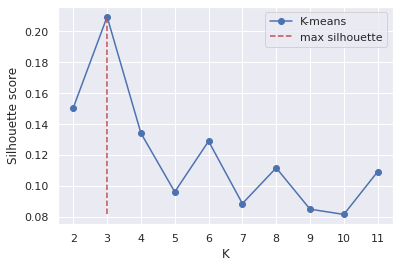

In [21]:
sil_score_std = []
for m in models_std:
    sil_score_std.append(silhouette_score(df_std[feat_cols], m.labels_))
    
plt.plot(CLUSTERS, sil_score_std, 'bo-', label="K-means")
plt.vlines(np.argmax(sil_score_std) + 2, min(sil_score_std), max(sil_score_std), 'r', '--', label="max silhouette")
plt.xticks(CLUSTERS)
plt.xlabel("K")
plt.xticks(range(2, 12))
plt.ylabel("Silhouette score")
plt.legend()
plt.show()

/home/gerardozinno/.pyenv/versions/3.9.9/envs/ml-environment/lib/python3.9/site-packages/kneed/knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

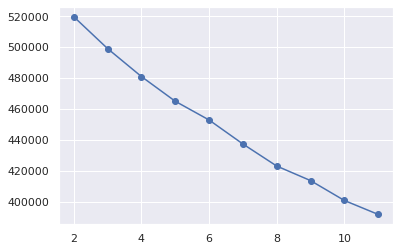

In [22]:
kl = KneeLocator(CLUSTERS, wcss_std, curve="convex", direction="decreasing")
plt.plot(CLUSTERS, wcss_std, 'o-', label="K-means")
plt.vlines(kl.elbow, min(wcss_std), max(wcss_std), 'r', '--', label="elbow")
plt.xticks(CLUSTERS)
plt.xlabel("K")
plt.ylabel("WCSS")
plt.legend()
plt.show()

## Clustering on minmax scaled dataset

In [24]:
wcss_minmax, models_minmax = run_kmeans(df_minmax[feat_cols])

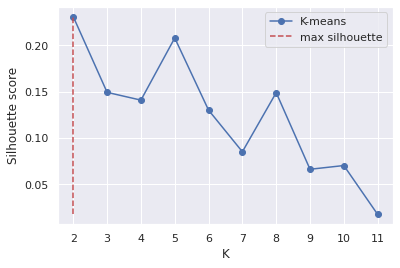

In [26]:
sil_score_minmax = []
for m in models_std:
    sil_score_minmax.append(silhouette_score(df_minmax[feat_cols], m.labels_))
    
plt.plot(CLUSTERS, sil_score_minmax, 'bo-', label="K-means")
plt.vlines(np.argmax(sil_score_minmax) + 2, min(sil_score_minmax), max(sil_score_minmax), 'r', '--', label="max silhouette")
plt.xticks(CLUSTERS)
plt.xlabel("K")
plt.xticks(range(2, 12))
plt.ylabel("Silhouette score")
plt.legend()
plt.show()

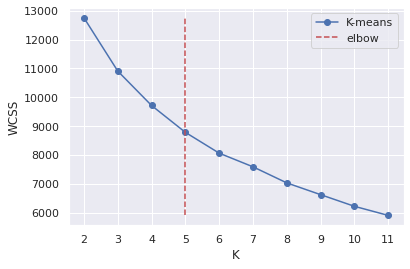

In [27]:
kl = KneeLocator(CLUSTERS, wcss_minmax, curve="convex", direction="decreasing")
plt.plot(CLUSTERS, wcss_minmax, 'o-', label="K-means")
plt.vlines(kl.elbow, min(wcss_minmax), max(wcss_minmax), 'r', '--', label="elbow")
plt.xticks(CLUSTERS)
plt.xlabel("K")
plt.ylabel("WCSS")
plt.legend()
plt.show()

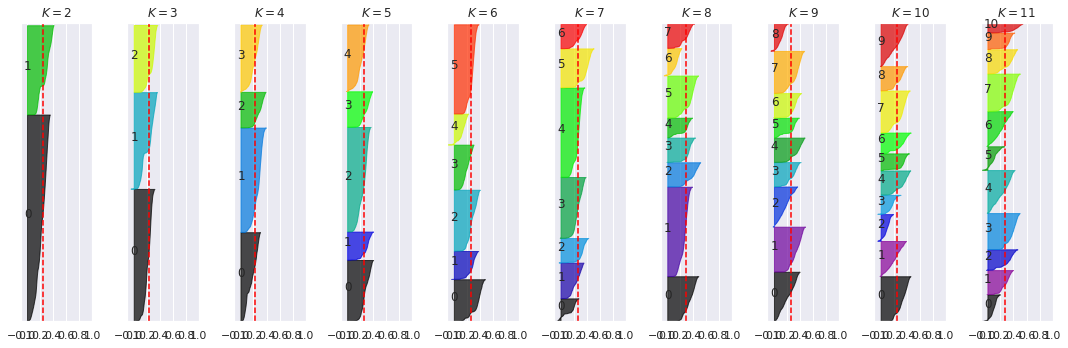

In [29]:
plot_silouette(df_minmax[feat_cols], models_minmax[0:10])

# Picking k=5

In [36]:
selected_kmeans = models_minmax[3]
centroids = selected_kmeans.cluster_centers_

In [34]:
df_minmax['Cluster'] = selected_kmeans.predict(df_minmax[feat_cols])

In [35]:
df_minmax['Cluster'].value_counts()

2    4176
4    2663
0    2444
3    1419
1    1127
Name: Cluster, dtype: int64

## Saving the kmeans model and the centroids

In [37]:
OUTPUTS_PATH = Path("diva_outputs")
OUTPUTS_PATH.mkdir(exist_ok=True)

In [40]:
np.savez(OUTPUTS_PATH / "centroids_minmax_k5", centroids=centroids)
save_pickle_bz2(OUTPUTS_PATH / "kmeans_minmax_k5.bz2", selected_kmeans)

# Test, Training, Validation splitting

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
train_test, validation = train_test_split(df_minmax, train_size=0.8, stratify=df_minmax['Cluster'], random_state=123)
train, test = train_test_split(train_test, train_size=0.7, stratify=train_test['Cluster'], random_state=123)

In [49]:
for s in ["train", "test", "validation"]:
    ss = eval(s)
    print(f"len({s})={len(ss)}")
    print("clusters distribution")
    print(ss['Cluster'].value_counts(normalize=True))

len(train)=6624
clusters distribution
2    0.353110
4    0.225091
0    0.206522
3    0.120018
1    0.095260
Name: Cluster, dtype: float64
len(test)=2839
clusters distribution
2    0.352941
4    0.225079
0    0.206763
3    0.119760
1    0.095456
Name: Cluster, dtype: float64
len(validation)=2366
clusters distribution
2    0.352916
4    0.225275
0    0.206678
3    0.120034
1    0.095097
Name: Cluster, dtype: float64


Generating the set of centroids neighbors

In [60]:
from sklearn.metrics import pairwise_distances

def find_nearest_neighbors(df: pd.DataFrame, centroids, k, columns_to_consider=feat_cols, cluster_col='Cluster', group_by=['Cluster']):
    """
    
    """
    assert len(columns_to_consider) == len(centroids[0])
    # indices of the elements to put in the final dataframe
    clustered_ind = []
    for (_, cluster), cent in zip(df.groupby(group_by), centroids):
        #print(cluster[cluster_col].value_counts())
        #print(f"Centroid: {cent}")
        features = cluster[columns_to_consider].copy()
        distances = pairwise_distances(features, [cent])
        features['Dist'] = distances
        # sort by distance and get the first k rows
        sorted_f = features.sort_values(by=['Dist']).head(k)
        clustered_ind += sorted_f.index.to_list()
    return df.loc[clustered_ind]

In [61]:
centroids_neighbors = find_nearest_neighbors(test, centroids, 8)

# Saving the sets

In [50]:
df_minmax.to_csv(OUTPUTS_PATH / "diva_minmax.csv")
train.to_csv(OUTPUTS_PATH / "diva_train.csv")
test.to_csv(OUTPUTS_PATH / "diva_test.csv")
validation.to_csv(OUTPUTS_PATH / "diva_validation.csv")
centroids_neighbors.to_csv(OUTPUTS_PATH / "diva_centroids_neighbors.csv")

# Creating a random forest

In [73]:
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [74]:
# Hyperparameters of the grid search
__HYPERPARAMETERS = {
    "bootstrap": [True, False],
    "max_depth": [100, 350, 500],
    "max_features": ["auto", "sqrt"],
    "min_samples_leaf": [10, 20, 50],
    "min_samples_split": [5, 10, 50],
    "n_estimators": [100, 150, 350, 500],
    "criterion": ["gini", "entropy"],
}

def create_random_forest(
        x,
        y,
        hyperparameters=__HYPERPARAMETERS,
        n_jobs=12
) -> RandomForestClassifier:
    """Creates a random forest classifier via grid search.

    Args:
        x (ndarray): Training input examples.
        y (ndarray): Training target values.
        hyperparameters (Dict[str, List[Any]], optional): Dictionary of hyperparameters for the grid search. Defaults to the fixed ones.
        n_jobs: Number of jobs to run in parallel in the grid search. (default 4)

    Returns:
        RandomForestClassifier: Random forest classifier.
    """

    rf = RandomForestClassifier()
    clf = HalvingGridSearchCV(rf, hyperparameters, refit=True, n_jobs=n_jobs, verbose=1)
    clf.fit(x, y)
    return clf.best_estimator_

## Loading the sets

In [69]:
trainset = pd.read_csv(OUTPUTS_PATH / "diva_train.csv")
testset  = pd.read_csv(OUTPUTS_PATH / "diva_test.csv")
cluster_neighbors = pd.read_csv(OUTPUTS_PATH / "diva_centroids_neighbors.csv")

In [78]:
X_train = trainset[feat_cols].to_numpy()
y_train = trainset['Target'].to_numpy()

X_test = testset[feat_cols].to_numpy()
y_test = testset['Target'].to_numpy()

x_test_clustered = cluster_neighbors[feat_cols].to_numpy()
y_test_clustered = cluster_neighbors['Target'].to_numpy()

In [79]:
assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)
assert len(x_test_clustered) == len(y_test_clustered)

In [80]:
rf = create_random_forest(X_train, y_train)

n_iterations: 6
n_required_iterations: 7
n_possible_iterations: 6
min_resources_: 20
max_resources_: 6624
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 864
n_resources: 20
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
----------
iter: 1
n_candidates: 288
n_resources: 60
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
----------
iter: 2
n_candidates: 96
n_resources: 180
Fitting 5 folds for each of 96 candidates, totalling 480 fits
----------
iter: 3
n_candidates: 32
n_resources: 540
Fitting 5 folds for each of 32 candidates, totalling 160 fits
----------
iter: 4
n_candidates: 11
n_resources: 1620
Fitting 5 folds for each of 11 candidates, totalling 55 fits
----------
iter: 5
n_candidates: 4
n_resources: 4860
Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [81]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2076
           1       0.84      0.67      0.75       763

    accuracy                           0.88      2839
   macro avg       0.86      0.81      0.83      2839
weighted avg       0.87      0.88      0.87      2839



In [82]:
save_pickle_bz2(OUTPUTS_PATH / "diva_minmax_randfor_k5.bz2", rf)
np.savez(OUTPUTS_PATH / "diva_minmax_randfor_data", X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, x_test_clustered=x_test_clustered, y_test_clustered=y_test_clustered)